In [2]:
# ====================================================================================
# NOTEBOOK 3: PYTHON VISUALIZATION, EDA, AND MACHINE LEARNING
# ====================================================================================

## 1. Setup - Import Libraries, Load Data
# ------------------------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# To handle class imbalance
from imblearn.over_sampling import SMOTE

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the cleaned dataset from Notebook 1
file_path = '/content/drive/MyDrive/Advanced HR Analytics Project/cleaned_hr_data.csv'
try:
    df = pd.read_csv(file_path)
    print("Cleaned dataset loaded successfully.")
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    df = pd.DataFrame()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cleaned dataset loaded successfully.
Dataset has 1470 rows and 36 columns.


--- 2.1. Distribution of the Target Variable (Attrition) ---


/tmp/ipython-input-1281831597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='attrition', data=df, palette='viridis')


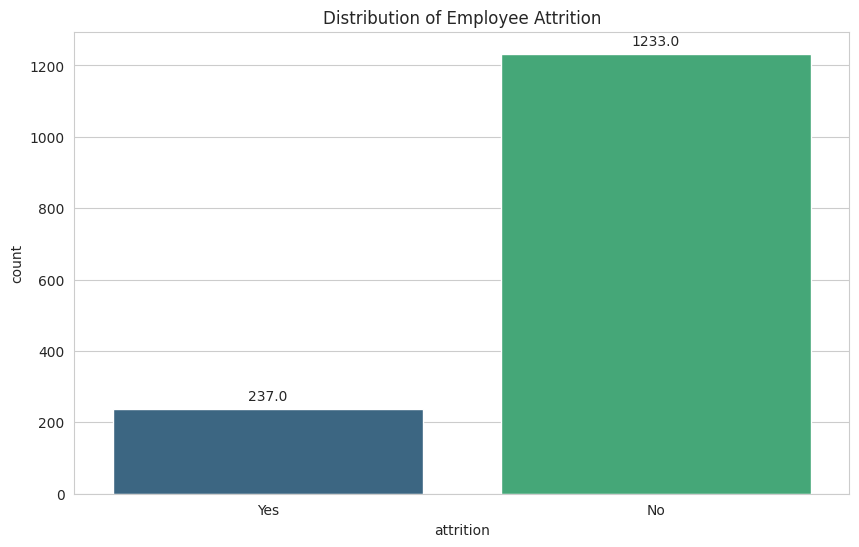

In [3]:
## 2. Basic Visualization (Initial Data Exploration)
print("--- 2.1. Distribution of the Target Variable (Attrition) ---")
# A count plot to see the class imbalance
ax = sns.countplot(x='attrition', data=df, palette='viridis')
plt.title('Distribution of Employee Attrition')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()
# We can clearly see the class imbalance here.



--- 2.2. Distribution of Key Numerical Features ---


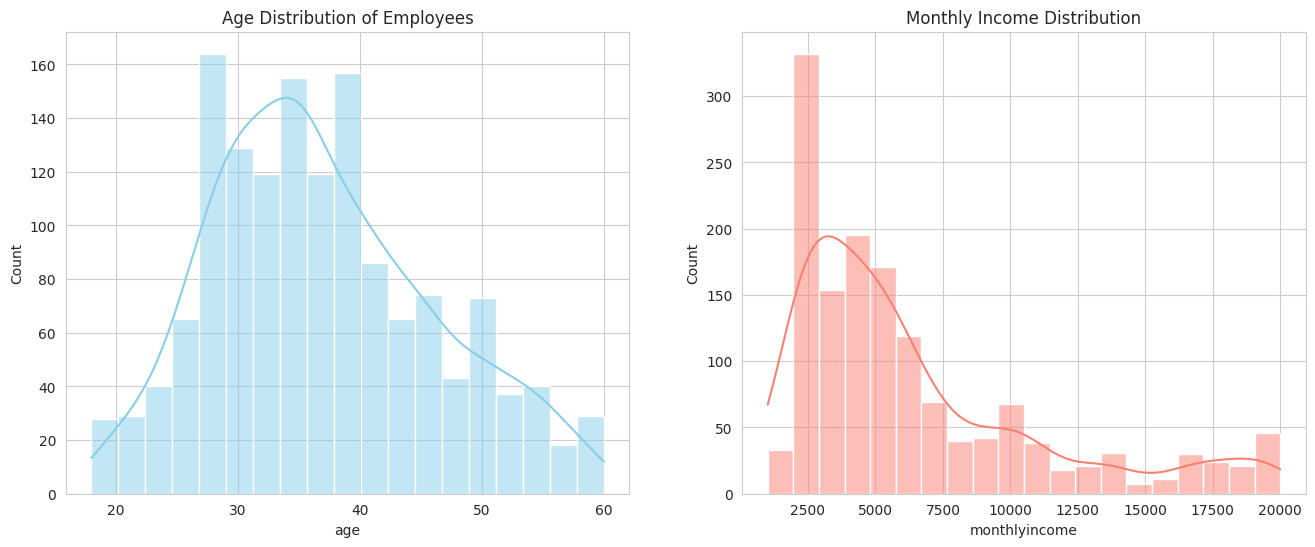

In [5]:
print("\n--- 2.2. Distribution of Key Numerical Features ---")
# Histograms for Age and Monthly Income
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df['age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution of Employees')
sns.histplot(df['monthlyincome'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Monthly Income Distribution')
plt.show()



--- 2.3. Distribution of Key Categorical Features ---


/tmp/ipython-input-2602214574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='department', data=df, palette='magma', order=df['department'].value_counts().index)


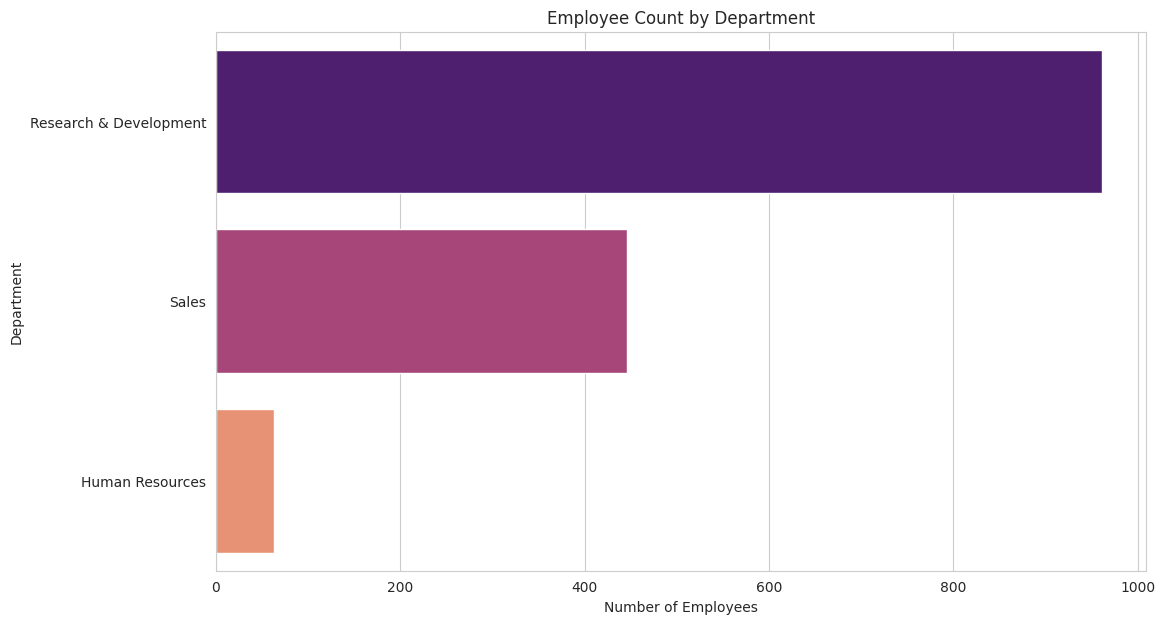

In [6]:
print("\n--- 2.3. Distribution of Key Categorical Features ---")
# Count plot for Department
plt.figure(figsize=(12, 7))
sns.countplot(y='department', data=df, palette='magma', order=df['department'].value_counts().index)
plt.title('Employee Count by Department')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.show()


--- 3.1. Tenure Distribution by Department ---


/tmp/ipython-input-2964072056.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='department', y='yearsatcompany', data=df, palette='coolwarm')


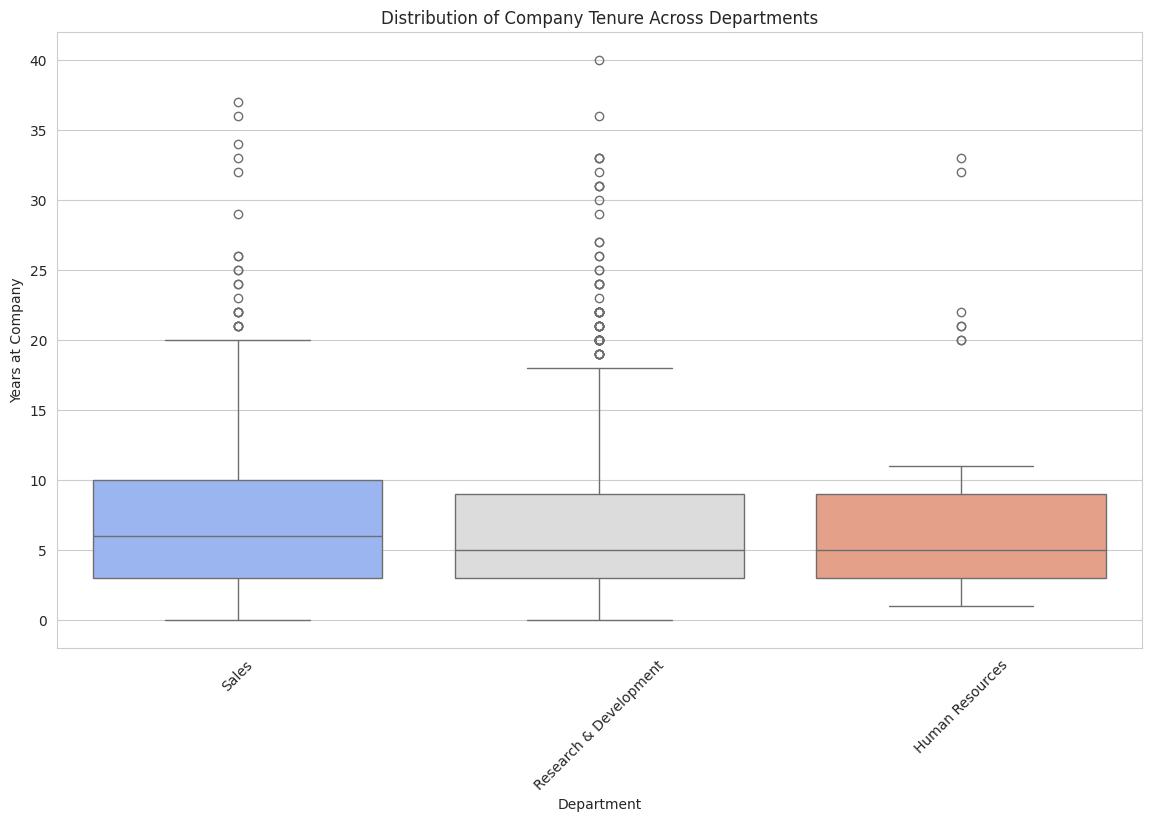

In [7]:
## 3. Exploratory Data Analysis (EDA - Answering Business Questions)
print("--- 3.1. Tenure Distribution by Department ---")
# Using a box plot to see the distribution of tenure across departments
plt.figure(figsize=(14, 8))
sns.boxplot(x='department', y='yearsatcompany', data=df, palette='coolwarm')
plt.title('Distribution of Company Tenure Across Departments')
plt.ylabel('Years at Company')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()
# This helps identify which departments have longer-tenured employees.


--- 3.2. Salary Equity Check (Gender vs. Job Role) ---


/tmp/ipython-input-2573468716.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthlyincome', y='jobrole', hue='gender', data=df, palette='plasma', ci=None)


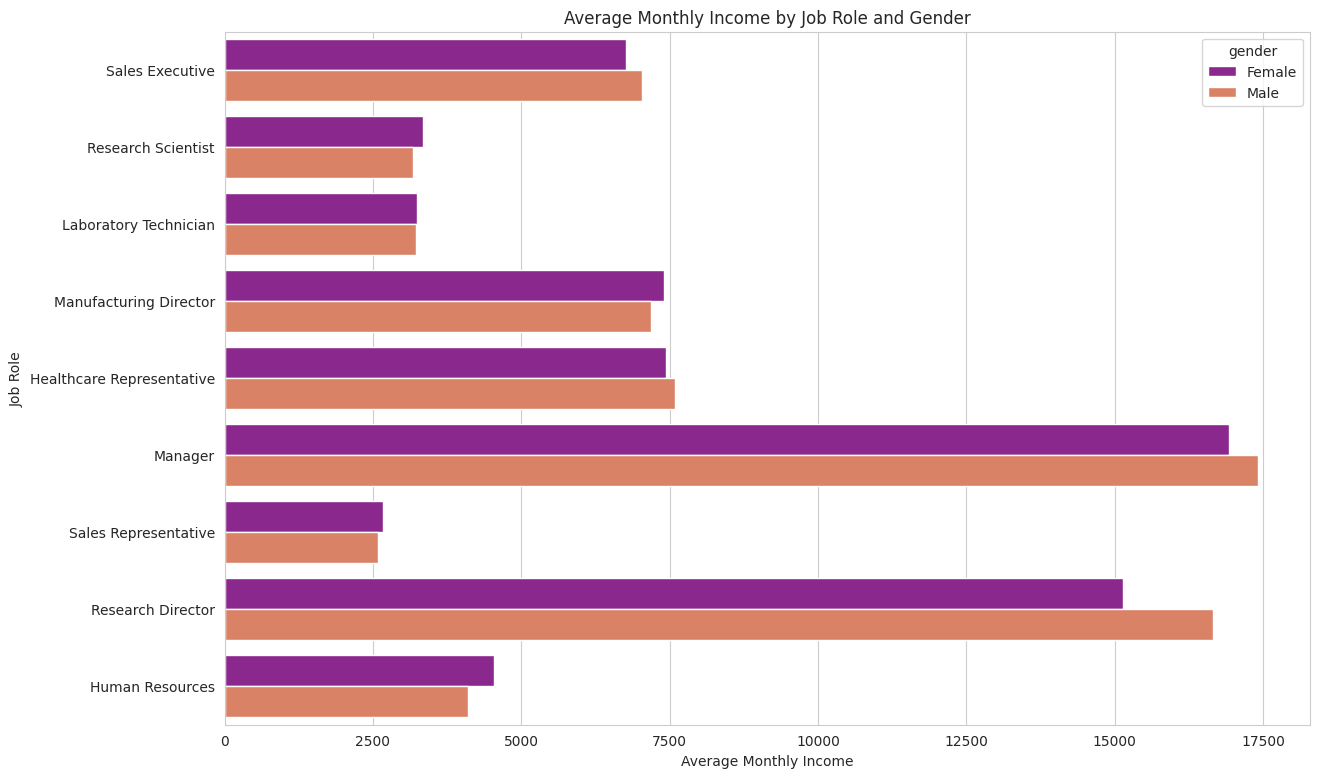

In [9]:
print("\n--- 3.2. Salary Equity Check (Gender vs. Job Role) ---")
# Let's check average salary by gender for each job role
plt.figure(figsize=(14, 9))
sns.barplot(x='monthlyincome', y='jobrole', hue='gender', data=df, palette='plasma', ci=None)
plt.title('Average Monthly Income by Job Role and Gender')
plt.xlabel('Average Monthly Income')
plt.ylabel('Job Role')
plt.show()
# This visual is crucial for D&I (Diversity & Inclusion) analysis.



--- 3.3. Exit Risk Profiling (Attrition by Marital Status) ---


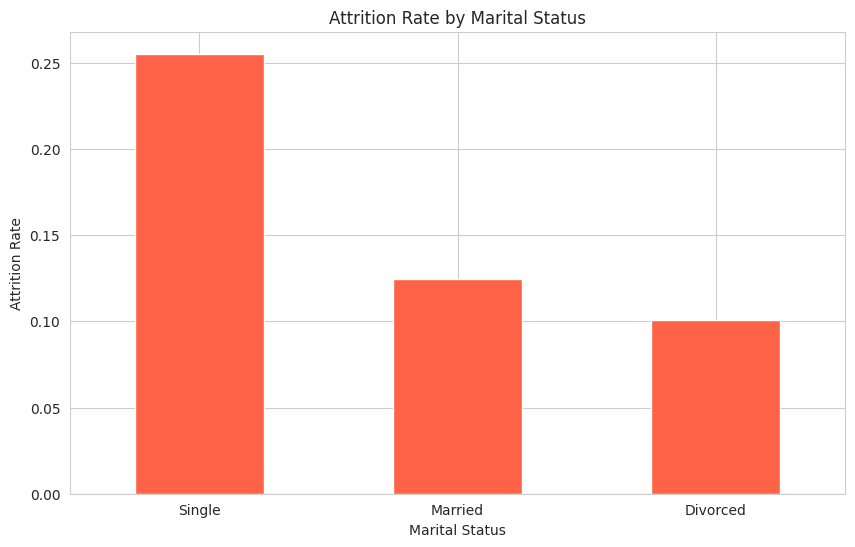

In [13]:
print("\n--- 3.3. Exit Risk Profiling (Attrition by Marital Status) ---")
# Calculating attrition rate
attrition_rate_marital = df.groupby('maritalstatus')['attrition_flag'].value_counts(normalize=True).unstack()
attrition_rate_marital = attrition_rate_marital.rename(columns={0: 'No', 1: 'Yes'})

# Plotting
attrition_rate_marital['Yes'].sort_values(ascending=False).plot(kind='bar', color='tomato')
plt.title('Attrition Rate by Marital Status')
plt.ylabel('Attrition Rate')
plt.xlabel('Marital Status')
plt.xticks(rotation=0)
plt.show()
# Clear insight: Single employees have a significantly higher attrition rate.


--- 1. Attrition Rate by Department and Job Role ---


/tmp/ipython-input-243370328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_attrition.index, y=dept_attrition.values, ax=axes[0], palette='crest')
/tmp/ipython-input-243370328.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_attrition.values, y=role_attrition.index, ax=axes[1], palette='flare')


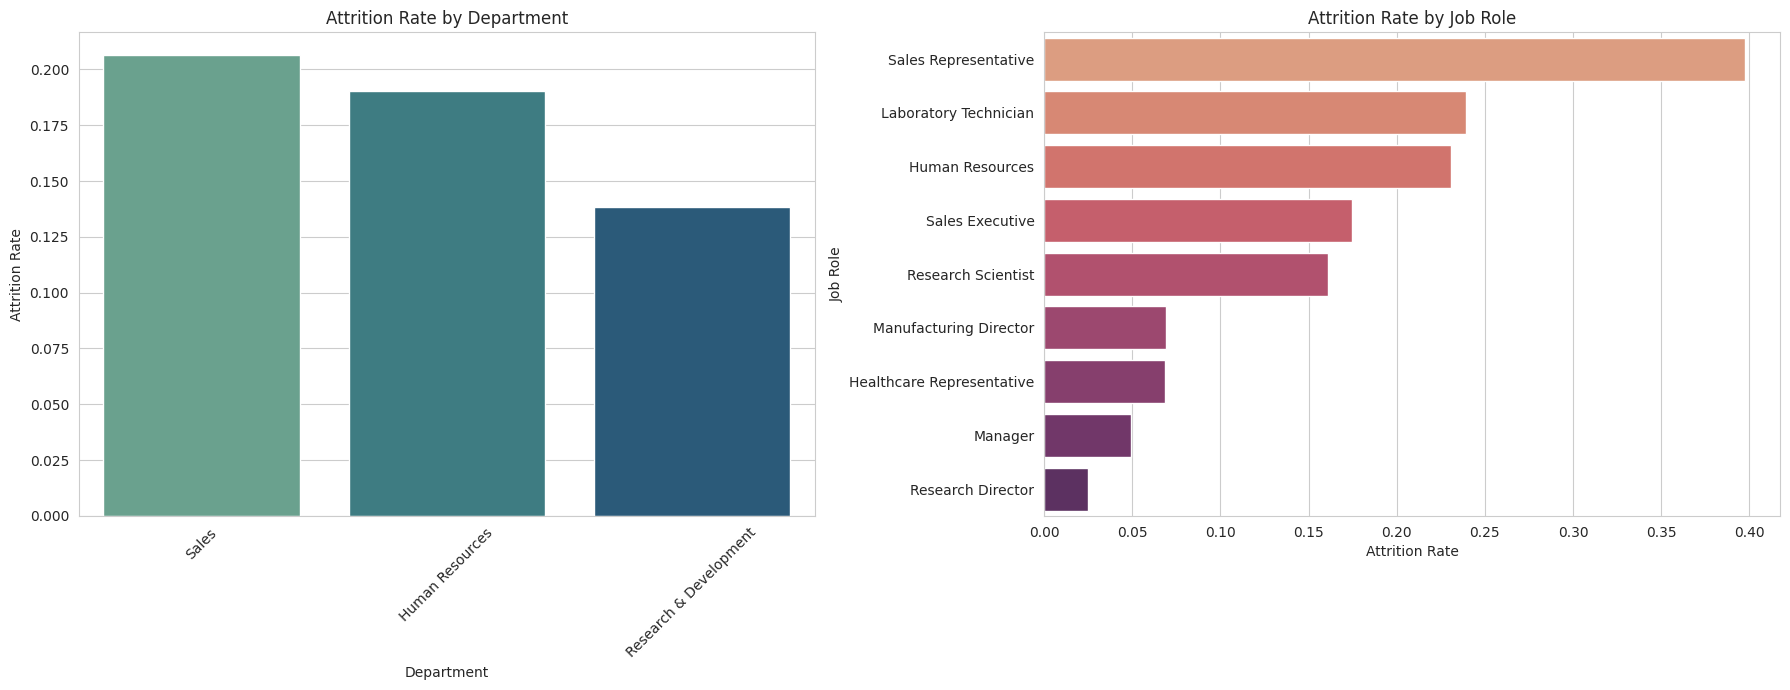

In [16]:
print("--- 1. Attrition Rate by Department and Job Role ---")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Attrition Rate by Department
dept_attrition = df.groupby('department')['attrition_flag'].mean().sort_values(ascending=False)
sns.barplot(x=dept_attrition.index, y=dept_attrition.values, ax=axes[0], palette='crest')
axes[0].set_title('Attrition Rate by Department')
axes[0].set_ylabel('Attrition Rate')
axes[0].set_xlabel('Department')
axes[0].tick_params(axis='x', rotation=45)

# Attrition Rate by Job Role
role_attrition = df.groupby('jobrole')['attrition_flag'].mean().sort_values(ascending=False)
sns.barplot(x=role_attrition.values, y=role_attrition.index, ax=axes[1], palette='flare')
axes[1].set_title('Attrition Rate by Job Role')
axes[1].set_xlabel('Attrition Rate')
axes[1].set_ylabel('Job Role')

plt.tight_layout()
plt.show()




--- 2. Key Numerical Features by Attrition Status ---


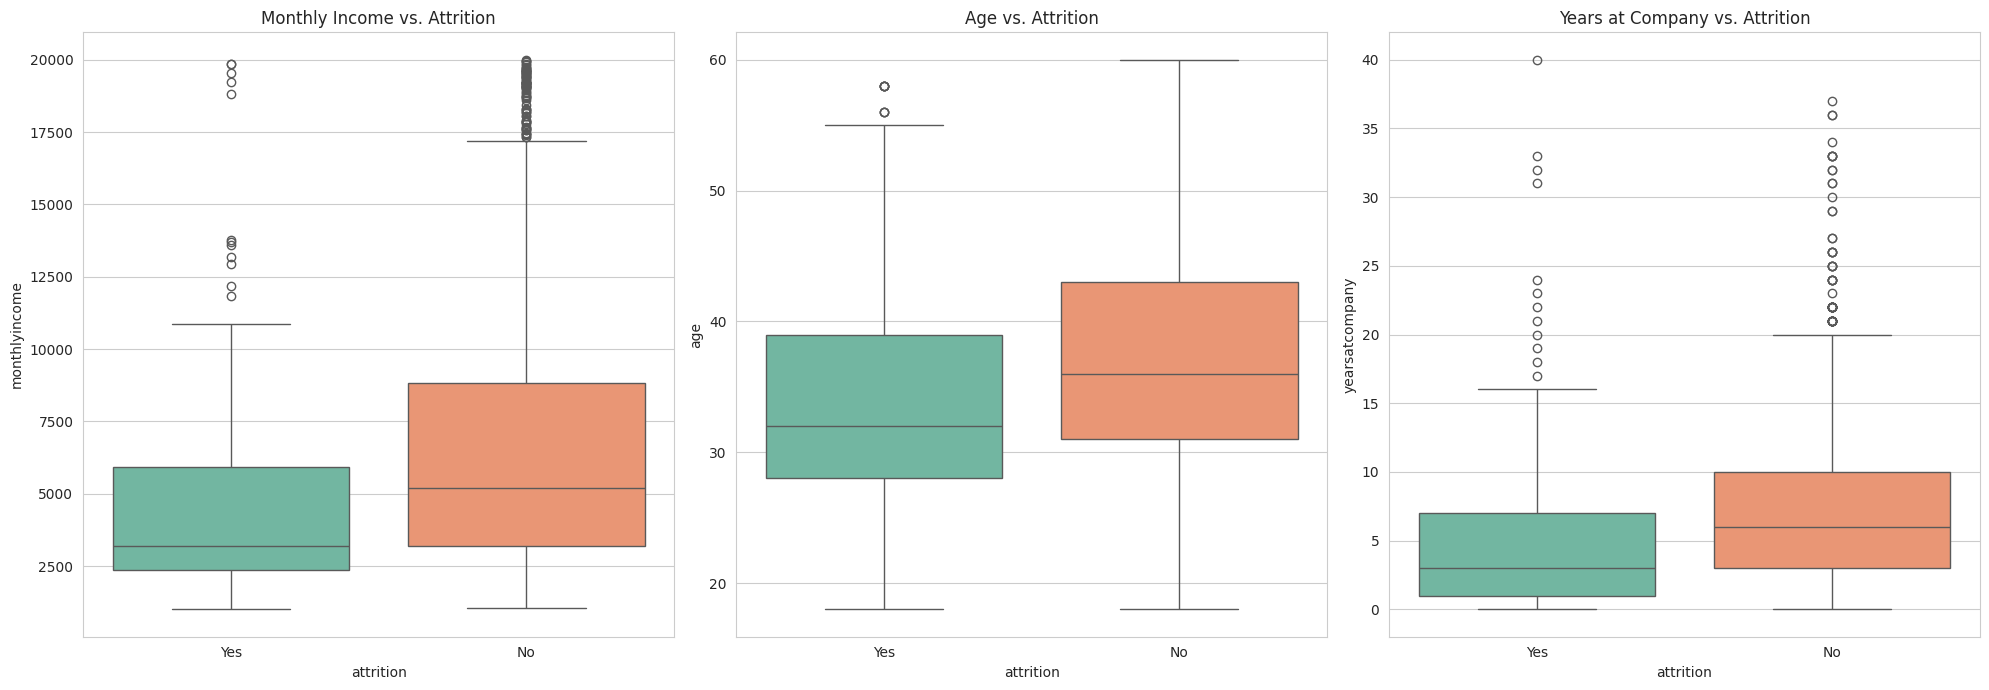

In [19]:
print("\n--- 2. Key Numerical Features by Attrition Status ---")
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Monthly Income by Attrition
sns.boxplot(x='attrition', y='monthlyincome', data=df, ax=axes[0], hue='attrition', palette='Set2', legend=False)
axes[0].set_title('Monthly Income vs. Attrition')

# Age by Attrition
sns.boxplot(x='attrition', y='age', data=df, ax=axes[1], hue='attrition', palette='Set2', legend=False)
axes[1].set_title('Age vs. Attrition')

# Years at Company by Attrition
sns.boxplot(x='attrition', y='yearsatcompany', data=df, ax=axes[2], hue='attrition', palette='Set2', legend=False)
axes[2].set_title('Years at Company vs. Attrition')

plt.tight_layout()
plt.show()



--- 3. Correlation Heatmap of Numeric Features ---


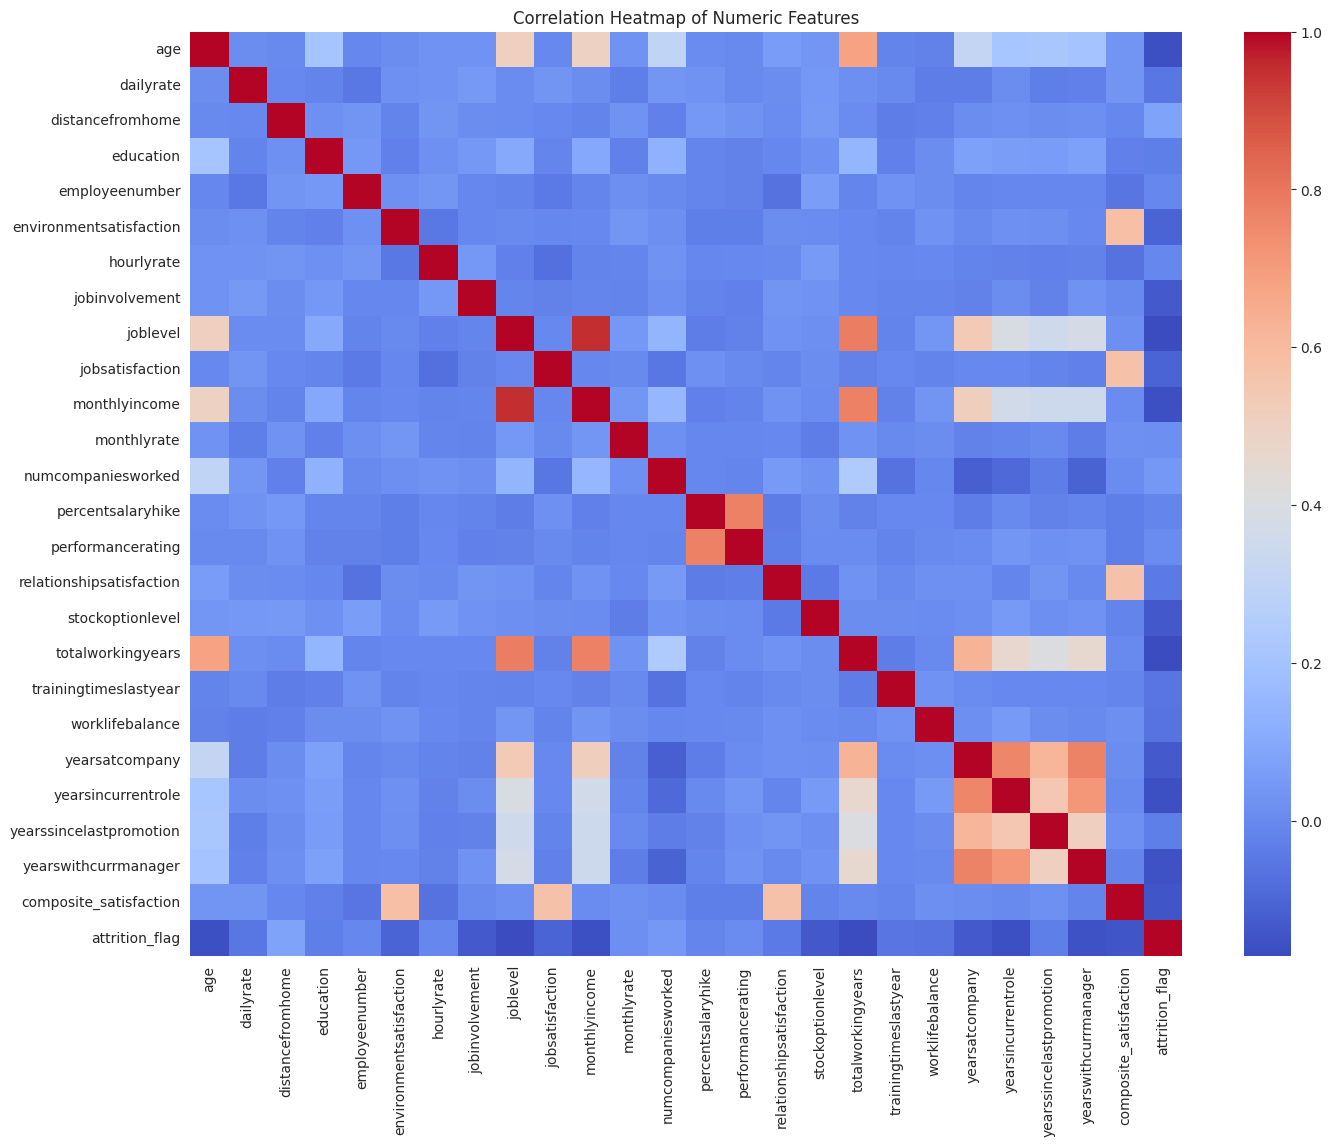

In [20]:
print("\n--- 3. Correlation Heatmap of Numeric Features ---")

# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')  # annot=True can be slow with many features
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [57]:
#Step 4: Feature Selection & Model Training
# --- Step 4.1: Initial Preprocessing & SMOTE ---

# Select features (X) and target (y)
X = df.drop(['attrition', 'attrition_flag', 'employeenumber'], axis=1)
y = df['attrition_flag']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Preprocessing and SMOTE application complete.")
print(f"Resampled training data shape: {X_train_resampled.shape}")
print(f"Test data shape: {X_test.shape}")
print("SMOTE applied to the training data.")
print(f"Original training target distribution:\n{y_train.value_counts()}")
print(f"Resampled training target distribution:\n{y_train_resampled.value_counts()}")

Preprocessing and SMOTE application complete.
Resampled training data shape: (1726, 52)
Test data shape: (441, 52)
SMOTE applied to the training data.
Original training target distribution:
attrition_flag
0    863
1    166
Name: count, dtype: int64
Resampled training target distribution:
attrition_flag
0    863
1    863
Name: count, dtype: int64


In [58]:
# --- Step 4.2: Train an Initial Model to Find Important Features ---

# Initialize and train a model on ALL resampled features
initial_rf = RandomForestClassifier(n_estimators=100, random_state=42)
initial_rf.fit(X_train_resampled, y_train_resampled)

# Extract the importance scores
importances = initial_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print("Top 10 most important features from the initial model:")
display(feature_importance_df.head(10))

Top 10 most important features from the initial model:


,feature,importance
44,overtime_Yes,0.103735
43,maritalstatus_Single,0.058409
9,monthlyincome,0.045787
15,stockoptionlevel,0.044783
23,composite_satisfaction,0.036658
0,age,0.031850
20,yearsincurrentrole,0.031798
22,yearswithcurrmanager,0.031551
16,totalworkingyears,0.029847
8,jobsatisfaction,0.029416


In [59]:
# --- Step 4.3: Select the Top N Most Important Features ---

# We'll choose the top 20 features. You can experiment with this number.
top_n = 15
top_features = feature_importance_df['feature'].head(top_n).tolist()

print(f"Selected the following {top_n} features:")
print(top_features)

Selected the following 15 features:
['overtime_Yes', 'maritalstatus_Single', 'monthlyincome', 'stockoptionlevel', 'composite_satisfaction', 'age', 'yearsincurrentrole', 'yearswithcurrmanager', 'totalworkingyears', 'jobsatisfaction', 'monthlyrate', 'yearsatcompany', 'joblevel', 'jobinvolvement', 'worklifebalance']


In [60]:
# --- Step 4.4: Create New Datasets with Only the Selected Features ---

# Filter the resampled training data
X_train_selected = X_train_resampled[top_features]

# Filter the original testing data
X_test_selected = X_test[top_features]

print("Created new, smaller datasets using only the selected features.")
print(f"New training data shape: {X_train_selected.shape}")
print(f"New test data shape: {X_test_selected.shape}")

Created new, smaller datasets using only the selected features.
New training data shape: (1726, 15)
New test data shape: (441, 15)


In [62]:
# --- Step 4.5: Train and Evaluate the Final Model (with all metrics) ---

print("Training final model on the selected features...")
# Initialize a new, final model
final_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train it ONLY on the selected features
final_rf.fit(X_train_selected, y_train_resampled)

# Make predictions on the selected test set
y_pred_fs = final_rf.predict(X_test_selected)
# Also get the prediction probabilities for the ROC-AUC score
y_pred_proba_fs = final_rf.predict_proba(X_test_selected)[:, 1]

print("\n--- Model Performance AFTER Feature Selection ---")
# ADDED the two lines below for Accuracy and ROC-AUC
print(f"Accuracy: {accuracy_score(y_test, y_pred_fs):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_fs):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_fs))

# Let's save the final model and its outputs for the next steps
rf_classifier = final_rf
y_pred = y_pred_fs
y_pred_proba = y_pred_proba_fs
# We update X_test to the selected version for the 'Intervention Tool' data
X_test = X_test_selected

Training final model on the selected features...

--- Model Performance AFTER Feature Selection ---
Accuracy: 0.83
ROC-AUC Score: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       370
           1       0.47      0.41      0.44        71

    accuracy                           0.83       441
   macro avg       0.68      0.66      0.67       441
weighted avg       0.82      0.83      0.83       441



In [63]:
# ====================================================================================
# FINAL IMPROVEMENT: ADJUSTING THE DECISION THRESHOLD
# ====================================================================================

# We will use the outputs from our best model so far: the 'final_rf'
# The prediction probabilities are stored in the 'y_pred_proba' variable.

print("--- Applying the final threshold adjustment to our best model (Random Forest) ---")

# Let's set a new, lower threshold to catch more potential leavers.
# 0.35 is a good starting point, but you can experiment with this value (e.g., 0.3, 0.4).
new_threshold = 0.35

# Apply the new threshold to the probabilities to get our final predictions
y_pred_adjusted = (y_pred_proba >= new_threshold).astype(int)

print(f"\n--- Final Model Performance with Adjusted Threshold of {new_threshold} ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_adjusted):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.2f}") # This score doesn't change with the threshold
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

# This is our best and final set of predictions.
# Let's make sure this is what gets saved for Power BI.
y_pred = y_pred_adjusted

print("\nThis model is now optimized to identify a higher number of at-risk employees.")

--- Applying the final threshold adjustment to our best model (Random Forest) ---

--- Final Model Performance with Adjusted Threshold of 0.35 ---
Accuracy: 0.78
ROC-AUC Score: 0.79

Final Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.86       370
           1       0.39      0.61      0.47        71

    accuracy                           0.78       441
   macro avg       0.65      0.71      0.67       441
weighted avg       0.83      0.78      0.80       441


This model is now optimized to identify a higher number of at-risk employees.


--- Analyzing Feature Importance of the Final Tuned Model ---


/tmp/ipython-input-254745681.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


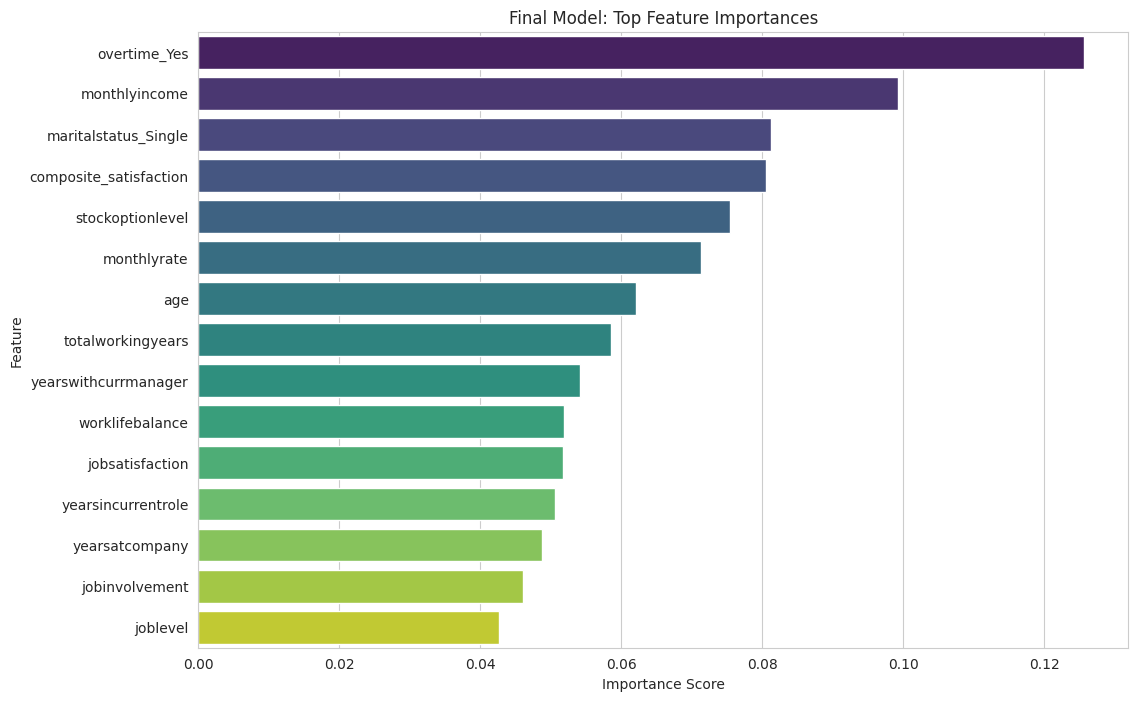

In [64]:
# ====================================================================================
# STEP 5: FEATURE IMPORTANCE ANALYSIS
# ====================================================================================

print("--- Analyzing Feature Importance of the Final Tuned Model ---")

# Get feature importances from our final, best model
importances = rf_classifier.feature_importances_
# The feature names are the columns of our feature-selected test set, X_test
feature_names = X_test.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Final Model: Top Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

--- Finding the optimal number of clusters using the Elbow Method ---


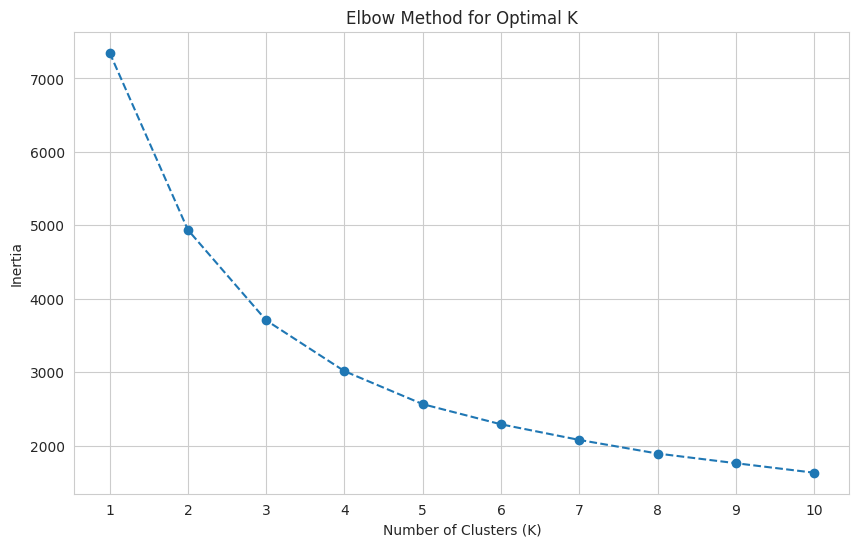

In [65]:
#Step 6: Employee Segmentation (Clustering)
# ====================================================================================
# STEP 6.1: FINDING OPTIMAL K WITH THE ELBOW METHOD
# ====================================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("--- Finding the optimal number of clusters using the Elbow Method ---")

# Select features for clustering from the original dataframe 'df'
cluster_features = ['composite_satisfaction', 'monthlyincome', 'yearsatcompany', 'joblevel', 'performancerating']
cluster_df = df[cluster_features]

# Scale the features
scaler = StandardScaler()
cluster_df_scaled = scaler.fit_transform(cluster_df)

# Calculate inertia for a range of k values
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to avoid FutureWarning
    kmeans.fit(cluster_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [66]:
# ====================================================================================
# STEP 6.2: APPLYING K-MEANS WITH CHOSEN K
# ====================================================================================

# Based on the elbow plot, we choose k=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Add the cluster label to our main dataframe 'df'
df['cluster'] = kmeans.fit_predict(cluster_df_scaled)
print(f"\nSuccessfully segmented employees into {k} clusters.")

# Analyze the resulting clusters by looking at their average characteristics
print("\nCluster Profiles (Averages):")
cluster_analysis = df.groupby('cluster')[cluster_features].mean().round(2)
display(cluster_analysis)


Successfully segmented employees into 4 clusters.

Cluster Profiles (Averages):


,composite_satisfaction,monthlyincome,yearsatcompany,joblevel,performancerating
cluster,,,,,
0,3.31,4625.85,5.34,1.64,3.00
1,2.76,15205.11,14.49,3.99,3.11
2,2.26,4795.28,5.45,1.69,3.00
3,2.66,4978.22,6.09,1.73,4.00


In [68]:
# ====================================================================================
# STEP 7: SAVE THE FINAL DATASET FOR POWER BI
# ====================================================================================

print("\n--- Preparing and saving the final, fully enriched dataset for Power BI... ---")

# Create a fresh copy of the dataframe which now includes the 'cluster' column
df_final_output = df.copy()

# Get the original row indices from our feature-selected test set (X_test)
test_indices = X_test.index

# Create new columns for our predictions
df_final_output['attrition_risk_score'] = np.nan
df_final_output['predicted_attrition'] = np.nan

# Place the prediction results into the correct rows using the indices
# We use the final, threshold-adjusted predictions from 'y_pred'
df_final_output.loc[test_indices, 'predicted_attrition'] = y_pred
# We use the probabilities from 'y_pred_proba'
df_final_output.loc[test_indices, 'attrition_risk_score'] = y_pred_proba

# Define the final output path
final_output_path = '/content/drive/MyDrive/Advanced HR Analytics Project/hr_data_with_predictions.csv'

# Save the final, enriched dataframe to CSV
df_final_output.to_csv(final_output_path, index=False)

print(f"\nSUCCESS! Final dataset saved to: {final_output_path}")
print("The Python phase of the project is now 100% complete.")


--- Preparing and saving the final, fully enriched dataset for Power BI... ---

SUCCESS! Final dataset saved to: /content/drive/MyDrive/Advanced HR Analytics Project/hr_data_with_predictions.csv
The Python phase of the project is now 100% complete.
